# Week 17: Classification Algorithms - Take Home Assignment

## Learning Objectives
By completing this assignment, you will:
- Implement K-Nearest Neighbors (KNN) classification
- Apply Support Vector Machines (SVM) with different kernels
- Build Naive Bayes classifiers for various scenarios
- Compare the performance of different classification algorithms
- Evaluate models using confusion matrices and accuracy metrics

---

# Part 1: Tasks

These tasks are designed to test your understanding of the fundamental concepts covered in Week 17.

---

## Task 1: K-Nearest Neighbors (KNN) Classification

**Objective:** Build a KNN classifier to predict customer purchase behavior.

**Dataset:** `Task-Datasets/task1_knn_customer_data.csv`

### Instructions:
1. Import the necessary libraries (pandas, numpy, sklearn)
2. Load the dataset and explore its structure
3. Separate features (Age, Annual_Salary) and target variable (Purchased)
4. Split the data into training (80%) and test (20%) sets
5. Apply feature scaling using StandardScaler
6. Build a KNN classifier with n_neighbors=5 and metric='minkowski' (p=2)
7. Train the model and make predictions
8. Evaluate using confusion matrix and accuracy score

### Expected Deliverables:
- Confusion matrix
- Accuracy score
- Brief interpretation of results

In [24]:
# Task 1: KNN Classification
# Import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
# Load and explore the dataset
task1_data = pd.read_csv('Task-Datasets/task1_knn_customer_data.csv')
task1_data.info()
task1_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    100 non-null    int64 
 1   Gender         100 non-null    object
 2   Age            100 non-null    int64 
 3   Annual_Salary  100 non-null    int64 
 4   Purchased      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


,Customer_ID,Gender,Age,Annual_Salary,Purchased
0,1,Male,19,19000,0
1,2,Male,35,20000,0
2,3,Female,26,43000,0
3,4,Female,27,57000,0
4,5,Male,19,76000,0


In [35]:
# Separate features and target variable
X = task1_data[['Age', 'Annual_Salary']]
Y = task1_data['Purchased']

In [43]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state=0)
Y_test

26    1
86    0
2     0
55    0
75    0
93    1
16    1
73    1
54    0
95    0
53    1
92    1
78    0
13    0
7     1
30    0
22    1
24    1
33    0
8     0
Name: Purchased, dtype: int64

In [45]:
# Apply feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
# Build and train the KNN classifier
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_model.fit(X_train, Y_train)

KNeighborsClassifier()

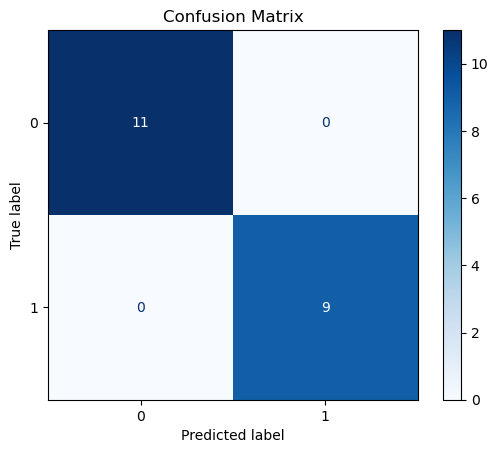

In [47]:
# Make predictions and evaluate
KNN_Y_pred = KNN_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(Y_test, KNN_Y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

This Result goes to show that our model accurately predicted all actual test set (100% accuracy score) without a sinlge error. 

---

## Task 2: Support Vector Machine (SVM) Classification

**Objective:** Implement SVM classifiers with different kernel functions to understand their impact on classification.

**Dataset:** `Task-Datasets/task2_svm_classification_data.csv`

### Instructions:
1. Import the necessary libraries
2. Load the dataset and understand its structure
3. Separate features (Feature1, Feature2) and target variable (Class)
4. Split the data into training (80%) and test (20%) sets
5. Apply feature scaling using StandardScaler
6. Build two SVM classifiers:
   - SVM with linear kernel
   - SVM with RBF (Radial Basis Function) kernel
7. Train both models and make predictions
8. Compare results using confusion matrices and accuracy scores

### Expected Deliverables:
- Confusion matrix and accuracy for linear kernel SVM
- Confusion matrix and accuracy for RBF kernel SVM
- Comparison of the two approaches

In [81]:
# Task 2: SVM Classification
# Import libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
# Load and explore the dataset
task2_data = pd.read_csv('Task-Datasets/task2_svm_classification_data.csv')
task2_data.info()
task2_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  148 non-null    float64
 1   Feature2  148 non-null    float64
 2   Class     148 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


,Feature1,Feature2,Class
0,1.2,2.3,0
1,-1.5,0.8,1
2,2.1,3.5,0
3,-2.3,-1.2,1
4,0.5,1.8,0


In [83]:
# Separate features and target, split data
X = task2_data[['Feature1', 'Feature2']]
Y = task2_data['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 0)

Y_test

24     0
7      1
37     1
114    0
27     1
26     0
43     1
54     0
132    0
71     1
76     0
22     0
83     1
130    0
100    0
73     1
44     0
16     0
51     1
66     0
8      0
133    1
93     1
90     0
86     0
40     0
101    1
107    1
92     0
145    1
Name: Class, dtype: int64

In [84]:
# Apply feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
# Build and train SVM with LINEAR kernel
SVM1_model = SVC(kernel='linear', random_state=0)
SVM1_model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

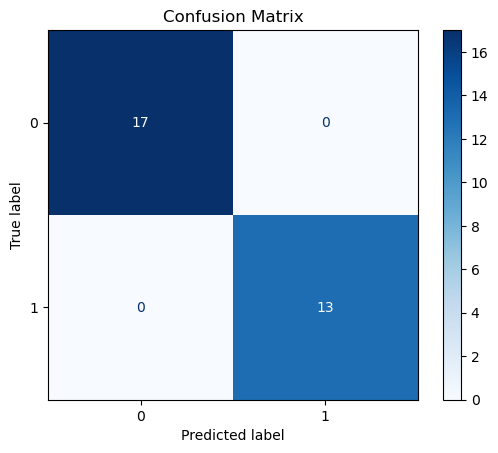

Accuracy: 1.0


In [86]:
# Predict
SVM1_Y_pred = SVM1_model.predict (X_test)

# Confusion Matrix
cm1 = confusion_matrix(Y_test, SVM1_Y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Accuracy score
accuracy1 = accuracy_score(Y_test, SVM1_Y_pred)
print("Accuracy:", accuracy1)

In [90]:
# Build and train SVM with RBF kernel
SVM2_model = SVC(kernel='rbf', random_state=0)
SVM2_model.fit(X_train, Y_train)

SVC(random_state=0)

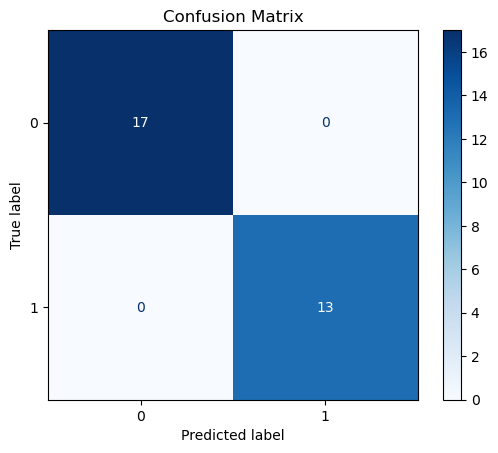

Accuracy: 1.0


In [91]:
# Predict
SVM2_Y_pred = SVM2_model.predict (X_test)

# Confusion Matrix
cm2 = confusion_matrix(Y_test, SVM2_Y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Accuracy score
accuracy2 = accuracy_score(Y_test, SVM2_Y_pred)
print("Accuracy:", accuracy2)

From Both results, we can see that both SVM models had a 100% accuracy score which implies that they accurately predicted the test sets results.

---

## Task 3: Naive Bayes Classification

**Objective:** Build a Naive Bayes classifier for email spam detection.

**Dataset:** `Task-Datasets/task3_naive_bayes_data.csv`

### Instructions:
1. Import the necessary libraries
2. Load the email classification dataset
3. Explore the data structure and feature distributions
4. Separate features (Word_Count, Link_Count, Uppercase_Ratio, Special_Char_Count, Contains_Urgent) and target (Is_Spam)
5. Split the data into training (80%) and test (20%) sets
6. Apply feature scaling using StandardScaler
7. Build a Gaussian Naive Bayes classifier
8. Train the model and make predictions
9. Evaluate using confusion matrix and accuracy score

### Expected Deliverables:
- Confusion matrix
- Accuracy score
- Discussion on why Naive Bayes is suitable for this problem

In [93]:
# Task 3: Naive Bayes Classification
# Import libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
# Load and explore the dataset
task3_data = pd.read_csv('Task-Datasets/task3_naive_bayes_data.csv')
task3_data.info()
task3_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Email_ID            120 non-null    int64  
 1   Word_Count          120 non-null    int64  
 2   Link_Count          120 non-null    int64  
 3   Uppercase_Ratio     120 non-null    float64
 4   Special_Char_Count  120 non-null    int64  
 5   Contains_Urgent     120 non-null    int64  
 6   Is_Spam             120 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.7 KB


,Email_ID,Word_Count,Link_Count,Uppercase_Ratio,Special_Char_Count,Contains_Urgent,Is_Spam
0,1,245,2,0.05,8,0,0
1,2,89,15,0.35,42,1,1
2,3,312,1,0.03,5,0,0
3,4,67,18,0.42,38,1,1
4,5,428,0,0.02,3,0,0


In [94]:
# Separate features and target, split data
X = task3_data[['Word_Count', 'Link_Count', 'Uppercase_Ratio', 'Special_Char_Count', 'Contains_Urgent']]
Y = task3_data['Is_Spam']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)

In [95]:
# Apply feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
# Build and train Gaussian Naive Bayes classifier
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

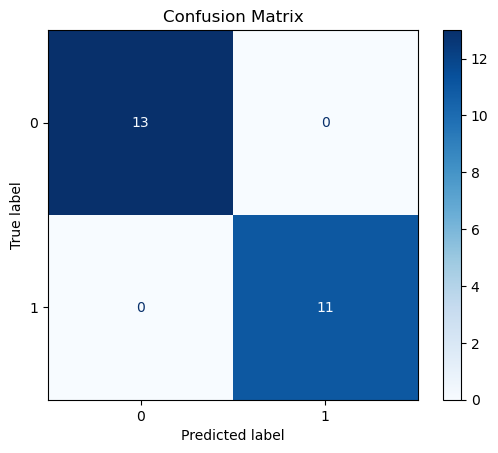

Accuracy: 1.0


In [98]:
# Make predictions and evaluate
NB_Y_pred = NB_model.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, NB_Y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Accuracy score
NB_accuracy = accuracy_score(Y_test, NB_Y_pred)
print("Accuracy:", NB_accuracy)

This result also gave us an accuracy score of 100%

---

# Part 2: Assignments

These assignments require deeper analysis and application of the concepts learned in Week 17.

---

## Assignment 1: KNN Hyperparameter Optimization for Product Recommendation

**Objective:** Find the optimal K value for a KNN classifier and understand its impact on model performance.

**Dataset:** `Assignment-Dataset/assignment1_product_recommendation.csv`

**Context:** An e-commerce company wants to predict which customers will purchase their premium product based on customer demographics and behavior.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform exploratory data analysis (EDA) to understand the data
4. Separate features (Age, Annual_Income, Spending_Score, Purchase_Frequency, Website_Visit_Duration, Product_Category_Preference) and target (Will_Buy_Premium)
5. Handle categorical feature (Product_Category_Preference) - encode appropriately
6. Split the data into training (80%) and test (20%) sets with random_state=42
7. Apply feature scaling using StandardScaler
8. Implement a loop to test K values from 1 to 20
9. For each K value, calculate:
   - Training accuracy
   - Test accuracy
10. Plot K values vs. accuracy (training and test) to visualize the elbow
11. Select the optimal K value and justify your choice
12. Build the final model with the optimal K and evaluate it

### Expected Deliverables:
- EDA visualizations and summary statistics
- Plot showing K values vs. accuracy
- Justification for optimal K value selection
- Final model evaluation with confusion matrix and accuracy
- Discussion on overfitting vs. underfitting based on the K value analysis

In [21]:
# Assignment 1: KNN Hyperparameter Optimization
# Import libraries

In [22]:
# Load and explore the dataset

In [23]:
# Exploratory Data Analysis (EDA)

In [24]:
# Prepare data: separate features/target, split, scale

In [25]:
# Test different K values (1 to 20)

In [26]:
# Plot K values vs accuracy

In [27]:
# Build final model with optimal K and evaluate

### Analysis and Conclusions

*Write your analysis here:*
- What is the optimal K value and why?
- How does K affect overfitting and underfitting?
- What business recommendations would you make based on this model?

---

## Assignment 2: SVM for Medical Diagnosis

**Objective:** Apply SVM classification to predict disease diagnosis and experiment with different kernels and C values.

**Dataset:** `Assignment-Dataset/assignment2_medical_diagnosis.csv`

**Context:** A healthcare organization wants to build a model to predict whether a patient is likely to have a certain condition based on various health indicators.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Handle any categorical variables appropriately (encode Smoking_Status)
4. Perform exploratory data analysis including:
   - Distribution of each feature
   - Correlation analysis
   - Class imbalance check
5. Separate features and target variable (Diagnosis)
6. Split the data into training (80%) and test (20%) sets with random_state=42
7. Apply feature scaling using StandardScaler
8. Train three SVM models:
   - Linear kernel with C=1
   - RBF kernel with C=1
   - RBF kernel with C=10
9. Compare the performance of all three models
10. Identify the best model and explain your reasoning

### Expected Deliverables:
- Complete EDA with visualizations
- Comparison table of all three models (accuracy, precision, recall)
- Confusion matrices for each model
- Discussion on the effect of kernel choice and C parameter
- Final model recommendation with justification

In [28]:
# Assignment 2: SVM for Medical Diagnosis
# Import libraries

In [29]:
# Load and explore the dataset

In [30]:
# Handle categorical variables

In [31]:
# Exploratory Data Analysis (EDA)

In [32]:
# Prepare data: separate features/target, split, scale

In [33]:
# Train SVM with LINEAR kernel (C=1)

In [34]:
# Train SVM with RBF kernel (C=1)

In [35]:
# Train SVM with RBF kernel (C=10)

In [36]:
# Compare all models and create comparison table

### Analysis and Conclusions

*Write your analysis here:*
- Which model performed best and why?
- How does the kernel choice affect the decision boundary?
- What is the impact of the C parameter on model performance?
- For medical diagnosis, which metrics are most important and why?

---

## Assignment 3: Classifier Comparison Study

**Objective:** Compare KNN, SVM, and Naive Bayes classifiers on the same dataset to understand their strengths and weaknesses.

**Dataset:** `Assignment-Dataset/assignment3_classifier_comparison.csv`

**Context:** A company wants to classify customer segments into three categories (Class_A, Class_B, Class_C) based on their behavioral metrics.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform comprehensive EDA including:
   - Feature distributions
   - Class distribution
   - Feature correlations
   - Pairwise scatter plots
4. Separate features (Feature_A, Feature_B, Feature_C, Feature_D) and target (Target_Class)
5. Handle categorical feature (Categorical_Feature) - encode appropriately
6. Encode the target variable (Class_A, Class_B, Class_C)
7. Split the data into training (80%) and test (20%) sets with random_state=42
8. Apply feature scaling using StandardScaler
9. Implement and evaluate three classifiers:
   - KNN (with optimal K from testing K=3, 5, 7)
   - SVM (with RBF kernel)
   - Gaussian Naive Bayes
10. Compare all classifiers using:
   - Accuracy
   - Confusion matrices
   - Classification reports (precision, recall, f1-score for each class)
11. Determine the best classifier for this multi-class problem

### Expected Deliverables:
- Comprehensive EDA visualizations
- Summary table comparing all classifiers
- Individual confusion matrices for each classifier
- Classification reports for each classifier
- Discussion on which classifier works best and why
- Recommendations for which classifier to use in production

In [37]:
# Assignment 3: Classifier Comparison Study
# Import libraries

In [38]:
# Load and explore the dataset

In [39]:
# Comprehensive Exploratory Data Analysis

In [40]:
# Visualize class distribution and feature correlations

In [41]:
# Prepare data: encode target, separate features/target, split, scale

In [42]:
# Implement KNN Classifier (test K=3, 5, 7)

In [43]:
# Implement SVM Classifier (RBF kernel)

In [44]:
# Implement Gaussian Naive Bayes Classifier

In [45]:
# Create comparison table and visualizations

### Analysis and Conclusions

*Write your analysis here:*
- Which classifier performed best overall?
- How did each classifier perform on individual classes?
- What are the trade-offs between the different classifiers?
- Which classifier would you recommend for production and why?

---

# Part 3: Assessment

This assessment evaluates your ability to apply all the classification techniques learned this week.

---

## Assessment: End-to-End Loan Approval Prediction System

**Objective:** Build a complete machine learning pipeline to predict loan approval decisions using multiple classification algorithms.

**Dataset:** `Assessment-Dataset/loan_approval_prediction.csv`

**Context:** A financial institution wants to automate their loan approval process. They have historical data on loan applications and want to build a predictive model that can help loan officers make faster and more consistent decisions.

---

### Section A: Data Loading and Exploration

1. Load the dataset and display basic information
2. Check for missing values and data types
3. Generate descriptive statistics
4. Visualize the target variable distribution (Loan_Approved)
5. Identify categorical vs. numerical features

In [70]:
# Section A: Data Loading and Exploration
# Import all necessary libraries

In [71]:
# Load and display dataset info

In [72]:
# Check for missing values and data types

In [73]:
# Generate descriptive statistics

In [74]:
# Visualize target variable distribution

---

### Section B: Exploratory Data Analysis

1. Analyze the relationship between each feature and loan approval
2. Create visualizations for:
   - Distribution of numerical features by loan approval status
   - Count plots for categorical features by loan approval status
   - Correlation heatmap for numerical features
3. Identify key features that might influence loan approval
4. Document your findings and insights

In [75]:
# Section B: Exploratory Data Analysis
# Analyze numerical features by loan approval

In [76]:
# Analyze categorical features by loan approval

In [77]:
# Create correlation heatmap

In [78]:
# Additional EDA visualizations

**EDA Findings:**

*Document your key findings here:*
- 
- 
- 

---

### Section C: Data Preprocessing

1. Handle categorical variables:
   - Encode Gender, Married, Education, Self_Employed, Property_Area, Previous_Loan_Status
2. Create feature matrix (X) and target vector (y)
   - Features: All columns except Application_ID and Loan_Approved
   - Target: Loan_Approved
3. Split data into training (80%) and test (20%) sets with random_state=42
4. Apply feature scaling using StandardScaler

In [79]:
# Section C: Data Preprocessing
# Handle categorical variables

In [80]:
# Create feature matrix and target vector

In [81]:
# Split data into training and test sets

In [82]:
# Apply feature scaling

---

### Section D: Model Building

Build and evaluate the following classifiers:

**D1. K-Nearest Neighbors**
- Test K values from 1 to 15
- Find the optimal K value
- Build final KNN model and evaluate

**D2. Support Vector Machine**
- Build SVM with linear kernel
- Build SVM with RBF kernel
- Compare and select the best

**D3. Naive Bayes**
- Build Gaussian Naive Bayes classifier
- Evaluate performance

In [83]:
# Section D1: K-Nearest Neighbors
# Test different K values

In [84]:
# Plot K values vs accuracy

In [85]:
# Build final KNN model with optimal K

In [86]:
# Section D2: Support Vector Machine
# SVM with Linear kernel

In [87]:
# SVM with RBF kernel

In [88]:
# Compare SVM models

In [89]:
# Section D3: Naive Bayes
# Build and evaluate Gaussian Naive Bayes

---

### Section E: Model Comparison and Selection

1. Create a comprehensive comparison table including:
   - Accuracy
   - Precision
   - Recall
   - F1-Score
   - Training time
2. Visualize the comparison using bar charts
3. Analyze confusion matrices for all models
4. Select the best model for the loan approval task
5. Justify your model selection considering:
   - Overall performance metrics
   - Business requirements (cost of false positives vs. false negatives)
   - Model interpretability
   - Computational efficiency

In [90]:
# Section E: Model Comparison
# Create comparison table

In [91]:
# Visualize comparison using bar charts

In [92]:
# Display confusion matrices for all models

In [93]:
# Final model selection and justification

---

### Section F: Conclusions and Recommendations

Write a comprehensive report addressing:

1. **Summary of Findings:**
   - Key features influencing loan approval
   - Performance of each classifier
   - Best performing model

2. **Business Recommendations:**
   - How can this model help the loan approval process?
   - What are the limitations of this approach?
   - What additional data might improve the model?

3. **Technical Recommendations:**
   - Which model should be deployed and why?
   - What monitoring should be in place?
   - How often should the model be retrained?

## Final Report

### 1. Summary of Findings

*Write your summary here:*


### 2. Business Recommendations

*Write your business recommendations here:*


### 3. Technical Recommendations

*Write your technical recommendations here:*



## Submission Guidelines

1. Complete all sections in this notebook
2. Ensure all code cells execute without errors
3. Include clear comments explaining your code
4. Provide thoughtful analysis and interpretations
5. Save your completed notebook with your name in the filename

**Good luck!**